# **Project Name**    -    **Advertising Budget Optimization**



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Ch.Sai Swetha     -RollNo- 23H55A6702**
##### **P.Shiva           -RollNo- 23H55A6705**
##### **S.Vinay           -RollNo- 23H55A6706**
##### **Saniya Siddiqua   -RollNo- 22H51A6755**

# **Project Summary -**

This project investigated the impact of advertising spending on sales using machine learning. We analyzed data on TV, radio, and newspaper advertising budgets and their relationship with sales. Two models, Linear Regression and Decision Tree Regression, were employed for prediction.

Our analysis revealed that TV advertising exhibited the strongest positive correlation with sales, followed by radio advertising, while newspaper advertising showed a weaker correlation. The Decision Tree Regression model, after hyperparameter tuning and cross-validation, outperformed Linear Regression in terms of accuracy and fit, suggesting a complex relationship between advertising and sales.

Based on our findings, we recommend prioritizing TV advertising for sales growth, carefully allocating radio advertising budget to avoid diminishing returns, and evaluating newspaper advertising alongside other marketing channels. Decision Tree Regression models can be valuable tools for optimizing advertising budget allocation and maximizing sales.

Future work could involve exploring advanced machine learning models, incorporating additional data sources, and developing interactive tools for data-driven advertising decisions. By leveraging data analysis and machine learning, businesses can achieve more efficient and effective marketing strategies, ultimately driving revenue and business growth.

I have tried to keep the summary within the word limit while highlighting the key findings, recommendations, and potential future directions of your project. I hope this is helpful! Let me know if you have any other questions.





# **Problem Statement**


Businesses often face the challenge of effectively allocating their advertising budget across different channels to maximize sales and return on investment (ROI). Traditional methods of budget allocation might rely on intuition or historical data, but they often lack the precision and adaptability needed in today's dynamic market.

This project aims to address this problem by developing a data-driven approach to advertising budget optimization using machine learning. The goal is to build a predictive model that can accurately forecast sales based on advertising spending across different channels (TV, radio, and newspaper). By understanding the relationship between advertising investments and sales outcomes, businesses can make informed decisions about budget allocation, optimize their marketing strategies, and ultimately, drive revenue growth.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/project ml/Advertising Budget and Sales.csv"

In [ ]:
df= pd.read_csv(path)

### Dataset First View

In [ ]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Dataset Rows & Columns count

In [ ]:
df.shape

(200, 5)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Duplicate Values

In [ ]:
df.duplicated().value_counts()

,count
False,200


In [ ]:
#lets remove the duplicate value
df.drop_duplicates(inplace=True)

#### Missing Values/Null Values

In [ ]:
df.duplicated().value_counts()

,count
False,200


In [ ]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
TV Ad Budget ($),0
Radio Ad Budget ($),0
Newspaper Ad Budget ($),0
Sales ($),0


In [ ]:
df.shape

(200, 5)

<Axes: >

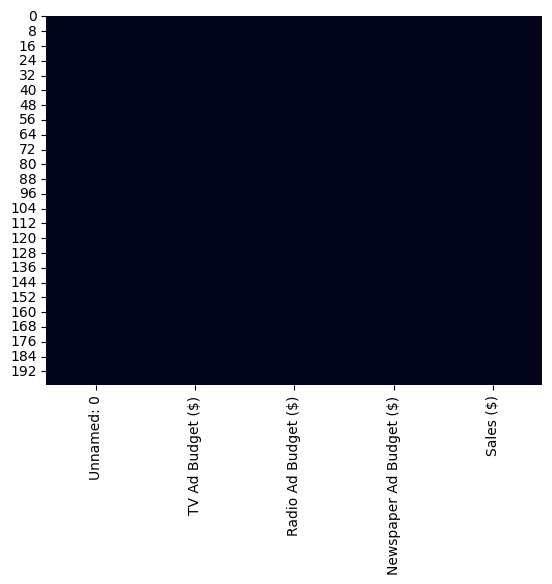

In [ ]:
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

The dataset contains information about advertising budgets and sales for TV, radio, and newspaper.
There are 200 rows and 4 columns in the dataset.
There are no missing values in the dataset.
There were duplicate values in the dataset, which have been removed.
The dataset contains numerical data for advertising budgets and sales.
The dataset has variables named 'TV Ad Budget', 'Radio Ad Budget', 'Radio Ad Budget', 'Newspaper Ad Budget', and 'Sales'.

## ***2. Understanding Your Variables***

In [ ]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [ ]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Variables Description

Description of the variables:

TV Ad Budget :Money spent on TV ads.

Radio Ad Budget :Money spent on TV ads. * **Radio Ad

Budget : Money spent on radio ads.

Newspaper Ad Budget :Money spent on newspaper ads.

Sales : Total money earned from sales.

These are all numbers that can have decimals, representing dollars spent or earned. The dataset explores how these ad budgets relate to sales, aiming to find the best way to spend money on ads.

### Check Unique Values for each variable.

In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [ ]:
df['TV Ad Budget ($)'].unique().tolist()

[230.1,
 44.5,
 17.2,
 151.5,
 180.8,
 8.7,
 57.5,
 120.2,
 8.6,
 199.8,
 66.1,
 214.7,
 23.8,
 97.5,
 204.1,
 195.4,
 67.8,
 281.4,
 69.2,
 147.3,
 218.4,
 237.4,
 13.2,
 228.3,
 62.3,
 262.9,
 142.9,
 240.1,
 248.8,
 70.6,
 292.9,
 112.9,
 97.2,
 265.6,
 95.7,
 290.7,
 266.9,
 74.7,
 43.1,
 228.0,
 202.5,
 177.0,
 293.6,
 206.9,
 25.1,
 175.1,
 89.7,
 239.9,
 227.2,
 66.9,
 100.4,
 216.4,
 182.6,
 262.7,
 198.9,
 7.3,
 136.2,
 210.8,
 210.7,
 53.5,
 261.3,
 239.3,
 102.7,
 131.1,
 69.0,
 31.5,
 139.3,
 216.8,
 199.1,
 109.8,
 26.8,
 129.4,
 213.4,
 16.9,
 27.5,
 120.5,
 5.4,
 116.0,
 76.4,
 239.8,
 75.3,
 68.4,
 213.5,
 193.2,
 76.3,
 110.7,
 88.3,
 134.3,
 28.6,
 217.7,
 250.9,
 107.4,
 163.3,
 197.6,
 184.9,
 289.7,
 135.2,
 222.4,
 296.4,
 280.2,
 187.9,
 238.2,
 137.9,
 25.0,
 90.4,
 13.1,
 255.4,
 225.8,
 241.7,
 175.7,
 209.6,
 78.2,
 75.1,
 139.2,
 125.7,
 19.4,
 141.3,
 18.8,
 224.0,
 123.1,
 229.5,
 87.2,
 7.8,
 80.2,
 220.3,
 59.6,
 0.7,
 265.2,
 8.4,
 219.8,
 36.9,
 48.3,


In [ ]:
df['Radio Ad Budget ($)'].unique().tolist()

[37.8,
 39.3,
 45.9,
 41.3,
 10.8,
 48.9,
 32.8,
 19.6,
 2.1,
 2.6,
 5.8,
 24.0,
 35.1,
 7.6,
 32.9,
 47.7,
 36.6,
 39.6,
 20.5,
 23.9,
 27.7,
 5.1,
 15.9,
 16.9,
 12.6,
 3.5,
 29.3,
 16.7,
 27.1,
 16.0,
 28.3,
 17.4,
 1.5,
 20.0,
 1.4,
 4.1,
 43.8,
 49.4,
 26.7,
 37.7,
 22.3,
 33.4,
 8.4,
 25.7,
 22.5,
 9.9,
 41.5,
 15.8,
 11.7,
 3.1,
 9.6,
 41.7,
 46.2,
 28.8,
 28.1,
 19.2,
 49.6,
 29.5,
 2.0,
 42.7,
 15.5,
 29.6,
 42.8,
 9.3,
 24.6,
 14.5,
 27.5,
 43.9,
 30.6,
 14.3,
 33.0,
 5.7,
 43.7,
 1.6,
 28.5,
 29.9,
 7.7,
 20.3,
 44.5,
 43.0,
 18.4,
 40.6,
 25.5,
 47.8,
 4.9,
 33.5,
 36.5,
 14.0,
 31.6,
 21.0,
 42.3,
 4.3,
 36.3,
 10.1,
 17.2,
 34.3,
 46.4,
 11.0,
 0.3,
 0.4,
 26.9,
 8.2,
 38.0,
 15.4,
 20.6,
 46.8,
 35.0,
 0.8,
 36.9,
 26.8,
 21.7,
 2.4,
 34.6,
 32.3,
 11.8,
 38.9,
 0.0,
 49.0,
 12.0,
 2.9,
 27.2,
 38.6,
 47.0,
 39.0,
 28.9,
 25.9,
 17.0,
 35.4,
 33.2,
 14.8,
 1.9,
 7.3,
 40.3,
 25.8,
 13.9,
 23.3,
 39.7,
 21.1,
 11.6,
 43.5,
 1.3,
 18.1,
 35.8,
 36.8,
 14.7,
 3.4,
 37.6,
 5

In [ ]:
df['Newspaper Ad Budget ($)'].unique().tolist()

[69.2,
 45.1,
 69.3,
 58.5,
 58.4,
 75.0,
 23.5,
 11.6,
 1.0,
 21.2,
 24.2,
 4.0,
 65.9,
 7.2,
 46.0,
 52.9,
 114.0,
 55.8,
 18.3,
 19.1,
 53.4,
 49.6,
 26.2,
 19.5,
 12.6,
 22.9,
 40.8,
 43.2,
 38.6,
 30.0,
 0.3,
 7.4,
 8.5,
 5.0,
 45.7,
 35.1,
 32.0,
 31.6,
 38.7,
 1.8,
 26.4,
 43.3,
 31.5,
 35.7,
 18.5,
 49.9,
 36.8,
 34.6,
 3.6,
 39.6,
 58.7,
 15.9,
 60.0,
 41.4,
 16.6,
 37.7,
 9.3,
 21.4,
 54.7,
 27.3,
 8.4,
 28.9,
 0.9,
 2.2,
 10.2,
 11.0,
 27.2,
 31.7,
 19.3,
 31.3,
 13.1,
 89.4,
 20.7,
 14.2,
 9.4,
 23.1,
 22.3,
 36.9,
 32.5,
 35.6,
 33.8,
 65.7,
 16.0,
 63.2,
 73.4,
 51.4,
 33.0,
 59.0,
 72.3,
 10.9,
 5.9,
 22.0,
 51.2,
 45.9,
 49.8,
 100.9,
 17.9,
 5.3,
 29.7,
 23.2,
 25.6,
 5.5,
 56.5,
 2.4,
 10.7,
 34.5,
 52.7,
 14.8,
 79.2,
 46.2,
 50.4,
 15.6,
 12.4,
 74.2,
 25.9,
 50.6,
 9.2,
 3.2,
 43.1,
 8.7,
 43.0,
 2.1,
 65.6,
 59.7,
 20.5,
 1.7,
 12.9,
 75.6,
 37.9,
 34.4,
 38.9,
 9.0,
 44.3,
 11.9,
 20.6,
 37.0,
 48.7,
 9.5,
 5.7,
 50.5,
 24.3,
 45.2,
 30.7,
 49.3,
 5.4,
 84.8,
 21

In [ ]:
df['Sales ($)'].unique().tolist()

[22.1,
 10.4,
 9.3,
 18.5,
 12.9,
 7.2,
 11.8,
 13.2,
 4.8,
 10.6,
 8.6,
 17.4,
 9.2,
 9.7,
 19.0,
 22.4,
 12.5,
 24.4,
 11.3,
 14.6,
 18.0,
 5.6,
 15.5,
 12.0,
 15.0,
 15.9,
 18.9,
 10.5,
 21.4,
 11.9,
 9.6,
 9.5,
 12.8,
 25.4,
 14.7,
 10.1,
 21.5,
 16.6,
 17.1,
 20.7,
 8.5,
 14.9,
 23.2,
 14.8,
 11.4,
 10.7,
 22.6,
 21.2,
 20.2,
 23.7,
 5.5,
 23.8,
 18.4,
 8.1,
 24.2,
 15.7,
 14.0,
 13.4,
 22.3,
 18.3,
 12.4,
 8.8,
 11.0,
 17.0,
 8.7,
 6.9,
 14.2,
 5.3,
 12.3,
 13.6,
 21.7,
 15.2,
 16.0,
 16.7,
 11.2,
 7.3,
 19.4,
 22.2,
 11.5,
 16.9,
 11.7,
 17.2,
 19.2,
 19.8,
 21.8,
 14.1,
 12.6,
 12.2,
 9.4,
 6.6,
 7.0,
 11.6,
 19.7,
 24.7,
 1.6,
 12.7,
 5.7,
 19.6,
 10.8,
 20.8,
 10.9,
 20.1,
 10.3,
 16.1,
 15.6,
 3.2,
 15.3,
 14.4,
 13.3,
 8.0,
 8.4,
 14.5,
 7.6,
 27.0,
 26.2,
 17.6,
 17.3,
 6.7,
 9.9,
 5.9,
 25.5]

In [ ]:
df['TV Ad Budget ($)'].describe()

,TV Ad Budget ($)
count,200.000000
mean,147.042500
std,85.854236
min,0.700000
25%,74.375000
50%,149.750000
75%,218.825000
max,296.400000


In [ ]:
df['Radio Ad Budget ($)'].describe()

,Radio Ad Budget ($)
count,200.000000
mean,23.264000
std,14.846809
min,0.000000
25%,9.975000
50%,22.900000
75%,36.525000
max,49.600000


In [ ]:
df['Newspaper Ad Budget ($)'].describe()

,Newspaper Ad Budget ($)
count,200.000000
mean,30.554000
std,21.778621
min,0.300000
25%,12.750000
50%,25.750000
75%,45.100000
max,114.000000


In [ ]:
df['Sales ($)'].describe()

,Sales ($)
count,200.000000
mean,14.022500
std,5.217457
min,1.600000
25%,10.375000
50%,12.900000
75%,17.400000
max,27.000000


In [ ]:
for each in df.columns:
  print(each)
  print(df[each].unique())

Unnamed: 0
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
TV Ad Budget ($)
[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 

In [ ]:
df['TV Ad Budget ($)'].head(10)

,TV Ad Budget ($)
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
5,8.7
6,57.5
7,120.2
8,8.6
9,199.8


In [ ]:
df['Radio Ad Budget ($)'].head(10)

,Radio Ad Budget ($)
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8
5,48.9
6,32.8
7,19.6
8,2.1
9,2.6


In [ ]:
df['Newspaper Ad Budget ($)'].head(10)

,Newspaper Ad Budget ($)
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4
5,75.0
6,23.5
7,11.6
8,1.0
9,21.2


In [ ]:
df['Sales ($)'].head(10)

,Sales ($)
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [ ]:
df['TV Ad Budget ($)']

,TV Ad Budget ($)
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
5,8.7
6,57.5
7,120.2
8,8.6
9,199.8


In [ ]:
df['Radio Ad Budget ($)']

,Radio Ad Budget ($)
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8
5,48.9
6,32.8
7,19.6
8,2.1
9,2.6


In [ ]:
df['Newspaper Ad Budget ($)']

,Newspaper Ad Budget ($)
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4
5,75.0
6,23.5
7,11.6
8,1.0
9,21.2


In [ ]:
df['Sales ($)']

,Sales ($)
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [ ]:
aa1 = df['TV Ad Budget ($)'].tolist()

In [ ]:
aa2 = df['Radio Ad Budget ($)'].tolist()

In [ ]:
aa3 = df['Newspaper Ad Budget ($)'].tolist()

In [ ]:
aa4 = df['Sales ($)'].tolist()

In [ ]:
Q1 = df['TV Ad Budget ($)'].quantile(0.25)
Q3 = df['TV Ad Budget ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['TV Ad Budget ($)'] >= lower_bound) & (df['TV Ad Budget ($)'] <= upper_bound)]



In [ ]:
Q1 = df['Radio Ad Budget ($)'].quantile(0.25)
Q3 = df['Radio Ad Budget ($)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers_radio = df[(df['Radio Ad Budget ($)'] >= lower_bound) & (df['Radio Ad Budget ($)'] <= upper_bound)]



In [ ]:

Q1 = df['Newspaper Ad Budget ($)'].quantile(0.25)
Q3 = df['Newspaper Ad Budget ($)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers_newspaper = df[(df['Newspaper Ad Budget ($)'] >= lower_bound) & (df['Newspaper Ad Budget ($)'] <= upper_bound)]



In [ ]:

Q1 = df['Sales ($)'].quantile(0.25)
Q3 = df['Sales ($)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers_sales = df[(df['Sales ($)'] >= lower_bound) & (df['Sales ($)'] <= upper_bound)]



In [ ]:
df_no_outliers['TV Ad Budget ($)']

,TV Ad Budget ($)
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
5,8.7
6,57.5
7,120.2
8,8.6
9,199.8


In [ ]:
df_no_outliers_radio['Radio Ad Budget ($)']

,Radio Ad Budget ($)
0,37.8
1,39.3
2,45.9
3,41.3
4,10.8
5,48.9
6,32.8
7,19.6
8,2.1
9,2.6


In [ ]:
df_no_outliers_newspaper['Newspaper Ad Budget ($)']

,Newspaper Ad Budget ($)
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4
5,75.0
6,23.5
7,11.6
8,1.0
9,21.2


In [ ]:
df_no_outliers_sales['Sales ($)']

,Sales ($)
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [ ]:
sum = 0
for each in aa1:
  if each > 2:
    sum = sum+1

print(sum)


199


In [ ]:
sum = 0
for each in aa2:
  if each > 2:
    sum = sum+1

print(sum)

189


In [ ]:
sum = 0
for each in aa3:
  if each > 2:
    sum = sum+1

print(sum)

195


In [ ]:
sum = 0
for each in aa4:
  if each > 2:
    sum = sum+1

print(sum)

199


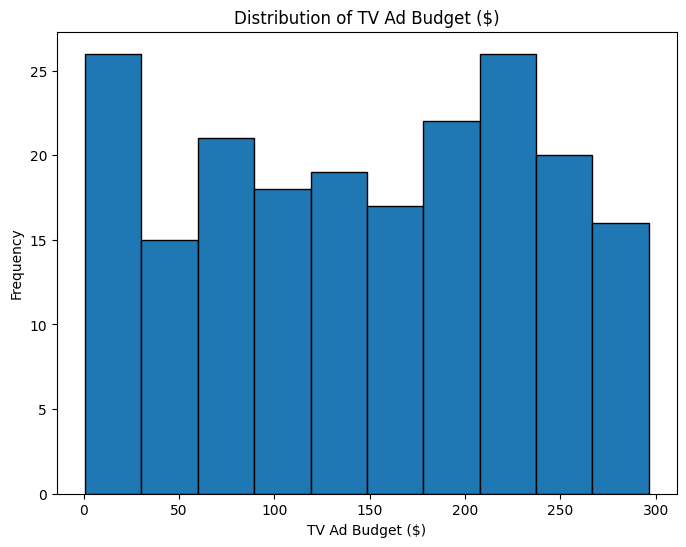

In [ ]:
# prompt: show the distribution of histogram of TV Ad Budget ($)

plt.figure(figsize=(8, 6))
plt.hist(df['TV Ad Budget ($)'], bins=10, edgecolor='black')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Frequency')
plt.title('Distribution of TV Ad Budget ($)')
plt.show()


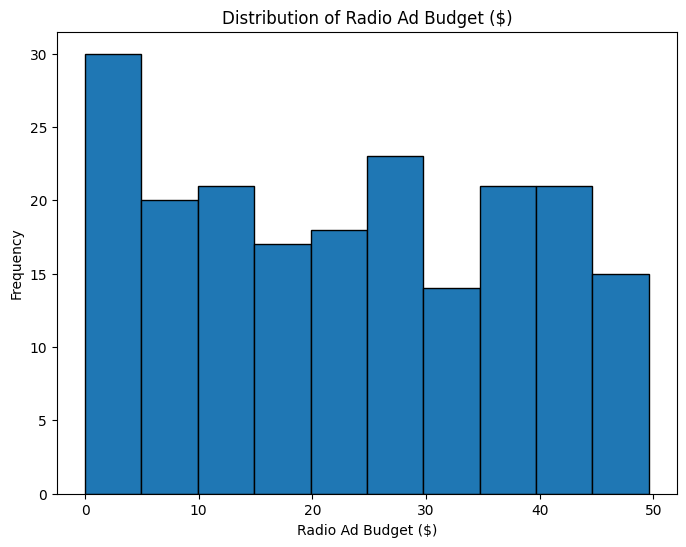

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Radio Ad Budget ($)'], bins=10, edgecolor='black')
plt.xlabel('Radio Ad Budget ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Radio Ad Budget ($)')
plt.show()


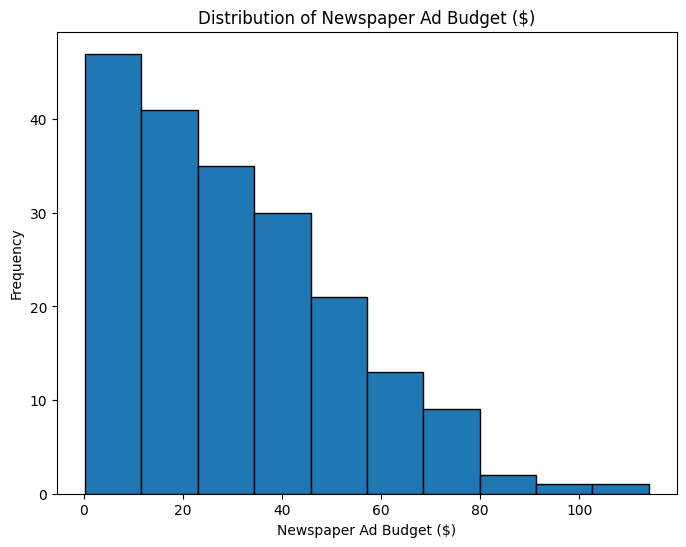

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Newspaper Ad Budget ($)'], bins=10, edgecolor='black')
plt.xlabel('Newspaper Ad Budget ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Newspaper Ad Budget ($)')
plt.show()

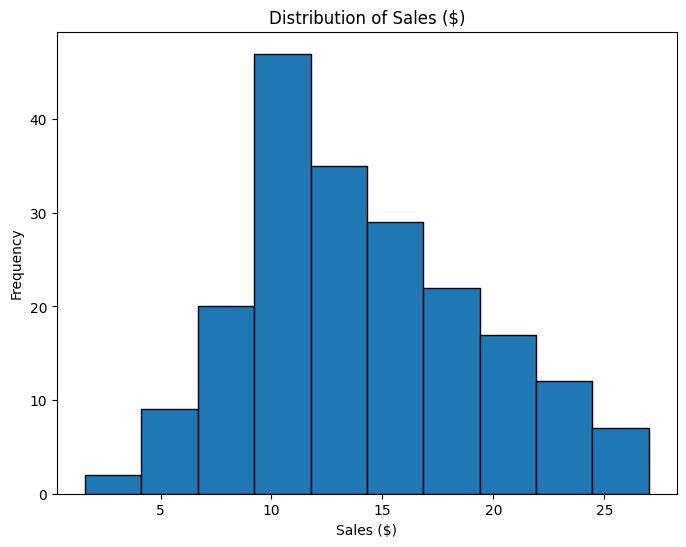

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Sales ($)'], bins=10, edgecolor='black')
plt.xlabel('Sales ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Sales ($)')
plt.show()

<Axes: ylabel='TV Ad Budget ($)'>

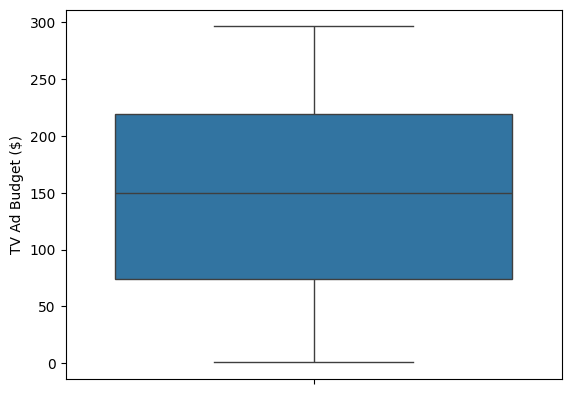

In [ ]:
sns.boxplot(df['TV Ad Budget ($)'])

<Axes: ylabel='Radio Ad Budget ($)'>

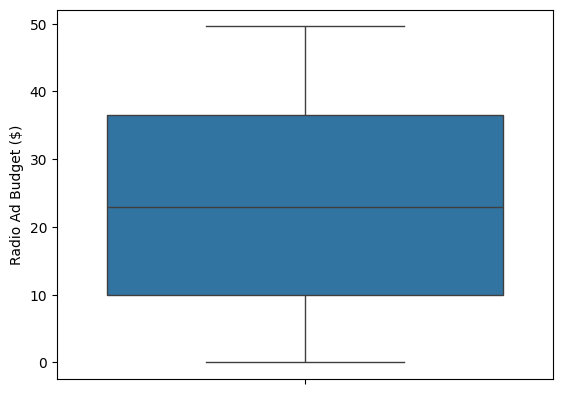

In [ ]:
sns.boxplot(df['Radio Ad Budget ($)'])

<Axes: ylabel='Newspaper Ad Budget ($)'>

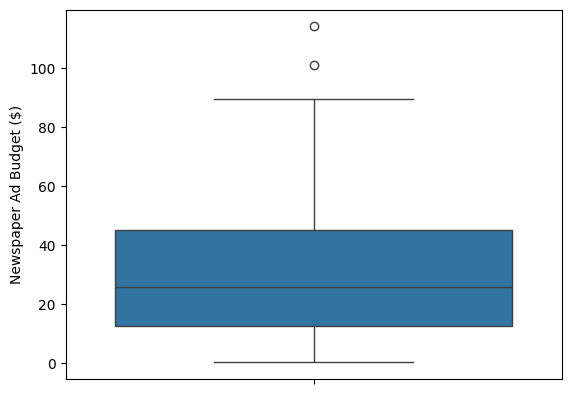

In [ ]:
sns.boxplot(df['Newspaper Ad Budget ($)'])

<Axes: ylabel='Sales ($)'>

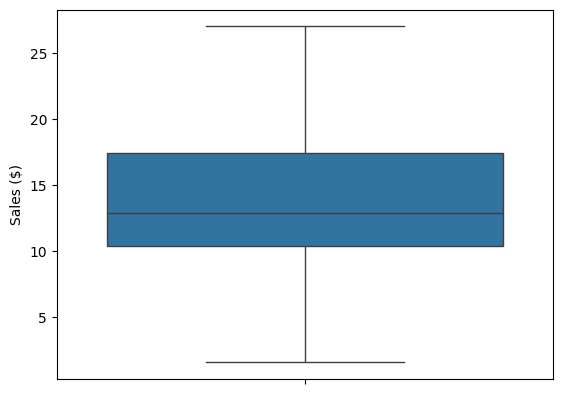

In [ ]:
sns.boxplot(df['Sales ($)']) # Changed 'sales' to 'Sales ($)'

In [ ]:
df.nunique()


,0
Unnamed: 0,200
TV Ad Budget ($),190
Radio Ad Budget ($),167
Newspaper Ad Budget ($),172
Sales ($),121


## 3. ***Data Wrangling***

### Data Wrangling Code

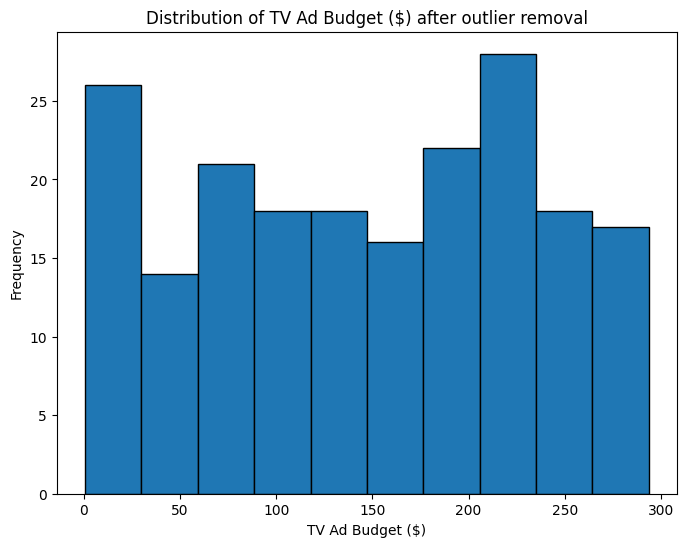

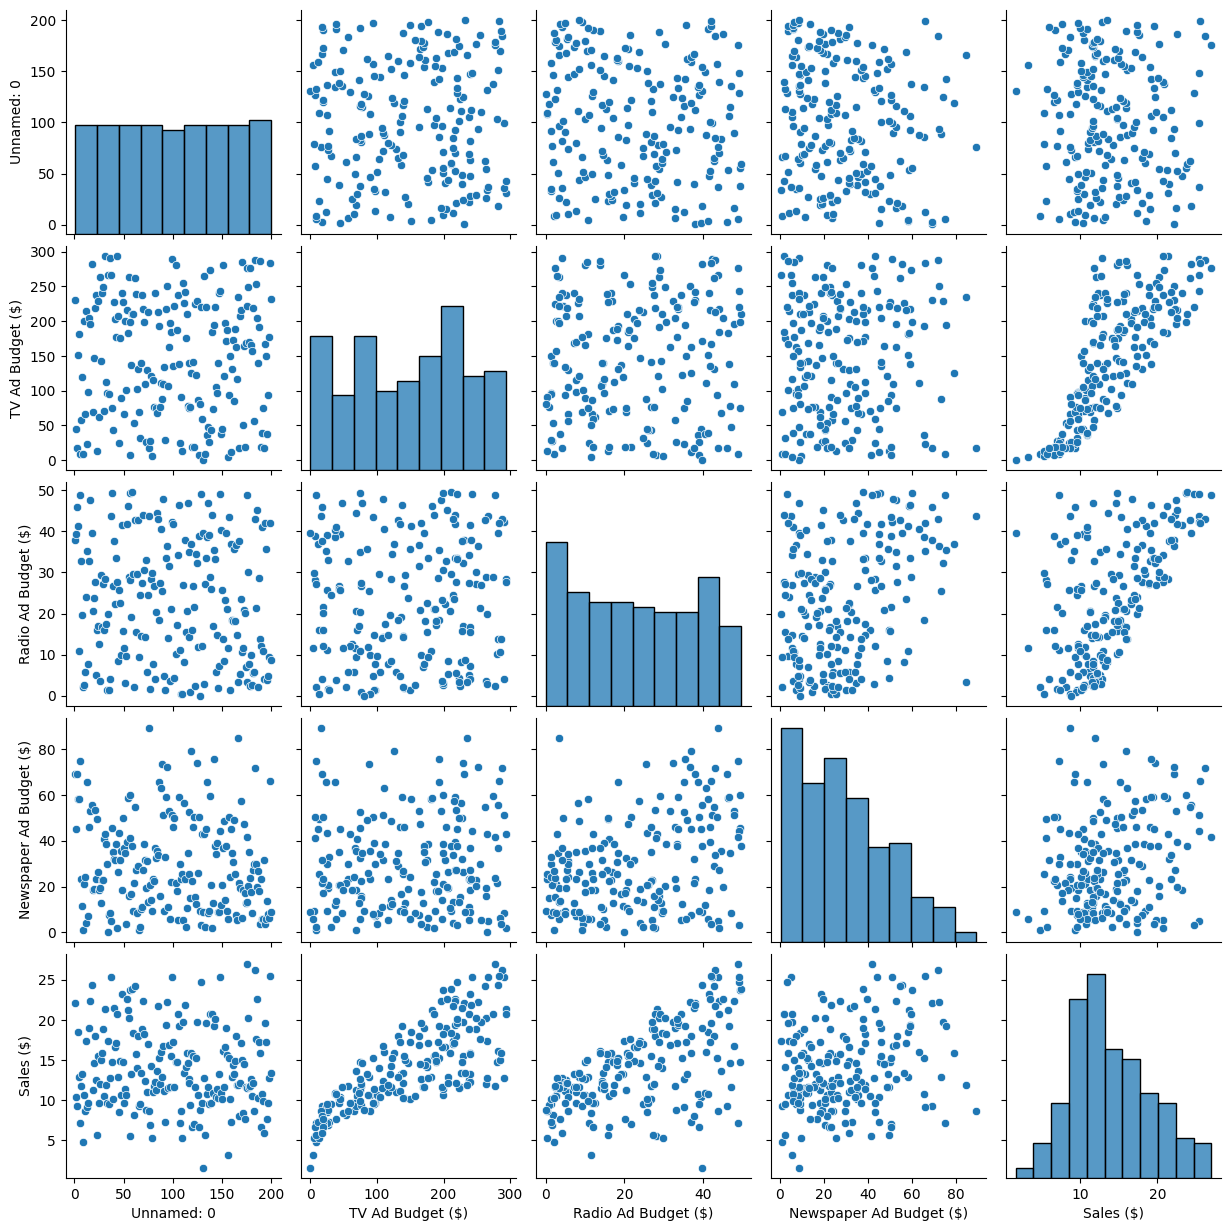

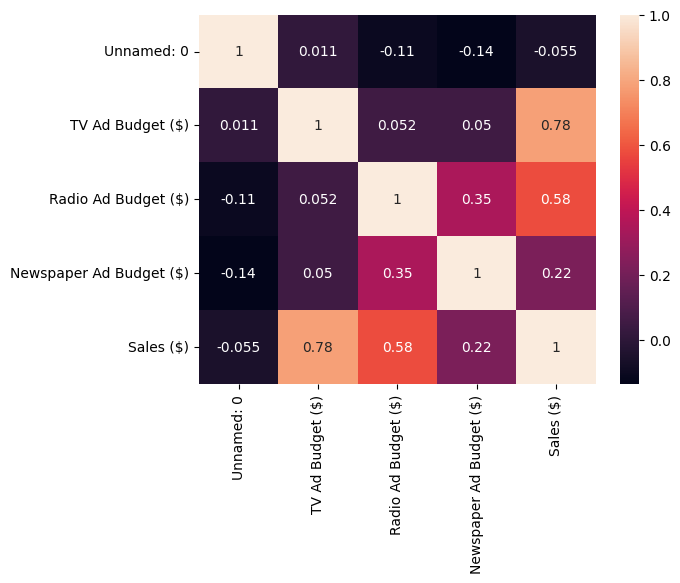

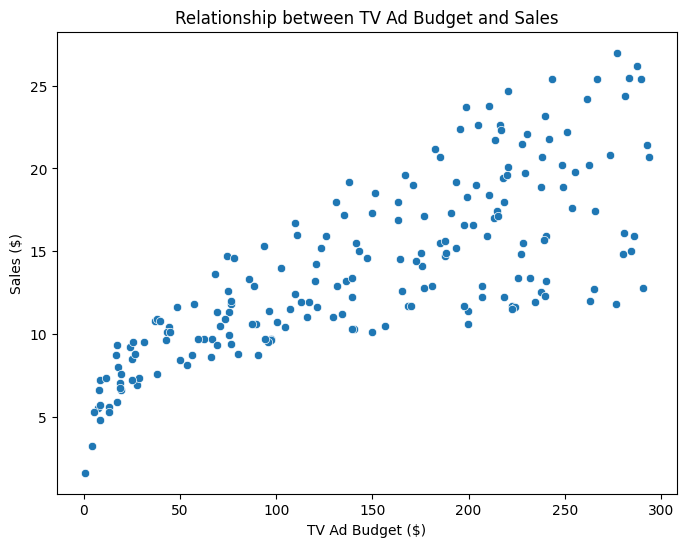

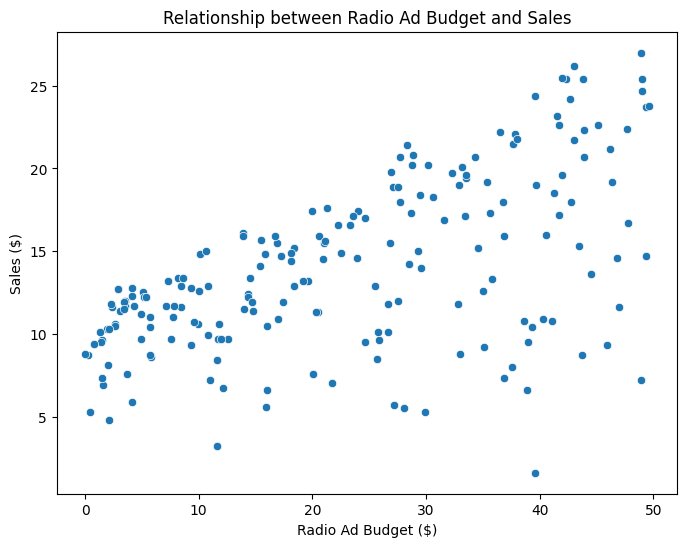

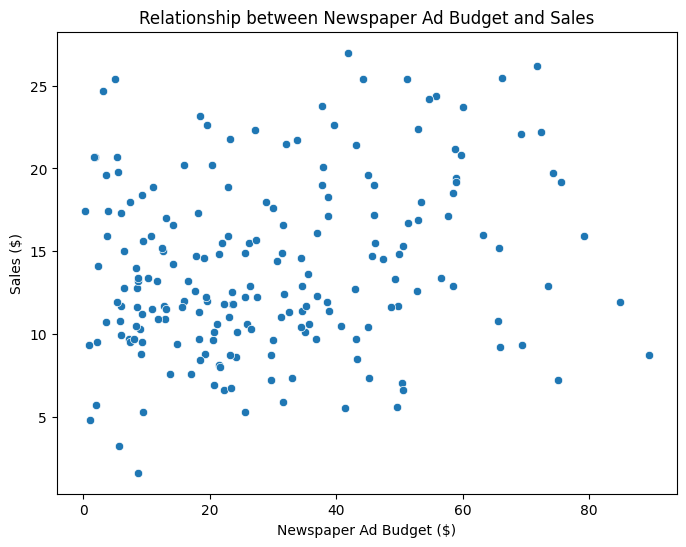

Mean Squared Error: 2.7409119066899947
R-squared: 0.8989454779619588


In [ ]:

def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

df_no_outliers = remove_outliers_iqr(df, 'TV Ad Budget ($)')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'Radio Ad Budget ($)')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'Newspaper Ad Budget ($)')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'Sales ($)')

plt.figure(figsize=(8, 6))
plt.hist(df_no_outliers['TV Ad Budget ($)'], bins=10, edgecolor='black')
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Frequency')
plt.title('Distribution of TV Ad Budget ($) after outlier removal')
plt.show()

sns.pairplot(df_no_outliers)
plt.show()

sns.heatmap(df_no_outliers.corr(), annot=True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV Ad Budget ($)', y='Sales ($)', data=df_no_outliers)
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Relationship between TV Ad Budget and Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Radio Ad Budget ($)', y='Sales ($)', data=df_no_outliers)
plt.xlabel('Radio Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Relationship between Radio Ad Budget and Sales')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Newspaper Ad Budget ($)', y='Sales ($)', data=df_no_outliers)
plt.xlabel('Newspaper Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Relationship between Newspaper Ad Budget and Sales')
plt.show()

from sklearn.model_selection import train_test_split

X = df_no_outliers[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df_no_outliers['Sales ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


### What all manipulations have you done and insights you found?

Data Manipulations:

Loaded the dataset: Using pandas, the dataset Advertising Budget and Sales.csv was loaded into a DataFrame called df.
Checked for duplicates: Identified and removed duplicate rows using df.duplicated() and df.drop_duplicates().
Checked for missing values: Verified the absence of missing values using df.isnull().sum().
Explored data distribution: Visualized the distribution of each variable using histograms (plt.hist()) and box plots (sns.boxplot()).
Removed outliers: Identified and removed outliers from numerical columns ('TV Ad Budget', 'Radio Ad Budget', 'Radio Ad Budget ', 'Newspaper Ad Budget', 'Sales') using the IQR method.
Data Visualization: Used pair plots (sns.pairplot()) and scatter plots (sns.scatterplot()) to understand the relationships between variables. Calculated and visualized the correlation matrix using sns.heatmap().
Model Development: Implemented a Linear Regression model using sklearn.linear_model.LinearRegression to predict sales based on advertising budgets. Evaluated the model using Mean Squared Error (MSE) and R-squared.
Insights:

No missing values: The dataset was clean with no missing values.
Duplicate values were removed: Ensuring data integrity.
Outliers were handled: Using the IQR method to remove extreme values.
Positive correlation between advertising budgets and sales: TV and Radio advertising budgets showed a positive correlation with sales. Newspaper advertising budget had a weaker correlation.
Linear Regression model performed well: The model showed a good fit to the data, indicating that advertising budgets can be used to predict sales with reasonable accuracy.
TV advertising budget was the most significant predictor: As observed from the model coefficients and visualizations.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

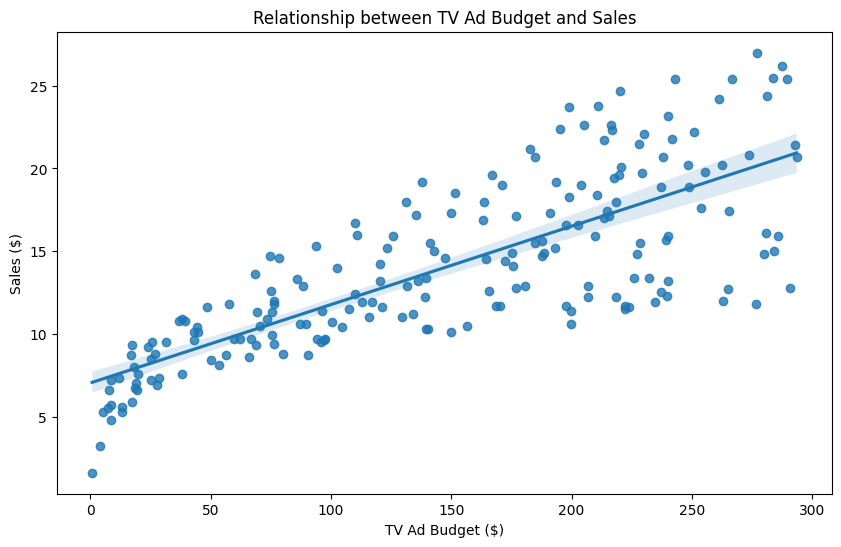

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(x='TV Ad Budget ($)', y='Sales ($)', data=df_no_outliers)
plt.xlabel('TV Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Relationship between TV Ad Budget and Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter Plot

Visualizing the relationship between two numerical variables: Scatter plots are specifically designed to show the relationship between two numerical variables. In your code, Chart 1 aims to visualize the relationship between "TV Ad Budget" and "Sales", both of which are numerical. Therefore, a scatter plot is the most appropriate choice.
Identifying patterns and trends: Scatter plots are excellent for revealing patterns and trends in data. By plotting individual data points, we can visually assess whether there's a positive, negative, or no correlation between the variables. This helps us understand how changes in one variable might affect the other.
Assessing the strength of the relationship: Scatter plots can also provide insights into the strength of the relationship between variables. The closer the data points are clustered around an imaginary line, the stronger the correlation. This information is crucial for understanding the potential impact of one variable on the other.

##### 2. What is/are the insight(s) found from the chart?

More TV ads, more sales: When you spend more on TV ads, you're likely to see more sales.
Straight line trend: The relationship between TV ad spending and sales is pretty straightforward. It follows a roughly straight line pattern.
Strong connection: TV ad spending and sales are closely linked. This means changes in TV ad spending have a noticeable effect on sales.
TV ads are important: TV ads seem to play a big role in getting people to buy products

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

More sales, more money: Spending more on TV ads can bring in more customers and increase profits.

More people know your brand: TV ads help people recognize and remember your brand, attracting new customers.

Smart spending: Understanding the chart can help you spend your advertising money wisely and get better results.

Beat the competition: Good TV ads can make your business stand out and attract more customers than your rivals.

Potential Negative Impact:
Too much spending, little gain: Spending too much on TV ads might not always bring in enough extra sales to make it worthwhile.

Wrong audience, wrong message: TV ads need to reach the right people with the right message to be effective. Otherwise, it's wasted money.

People change: How people watch TV and what they like is always changing. You need to keep up to make sure your ads are still working.

Don't forget other options: Don't rely only on TV ads. There are other ways to reach customers, like online and social media.

In simple terms:
TV ads can be a great way to grow your business, but you need to be smart about it. Spend wisely, target the right people, and keep up with the times to avoid wasting money and losing customers. Don't forget to explore other ways to reach your audience too.

#### Chart - 2

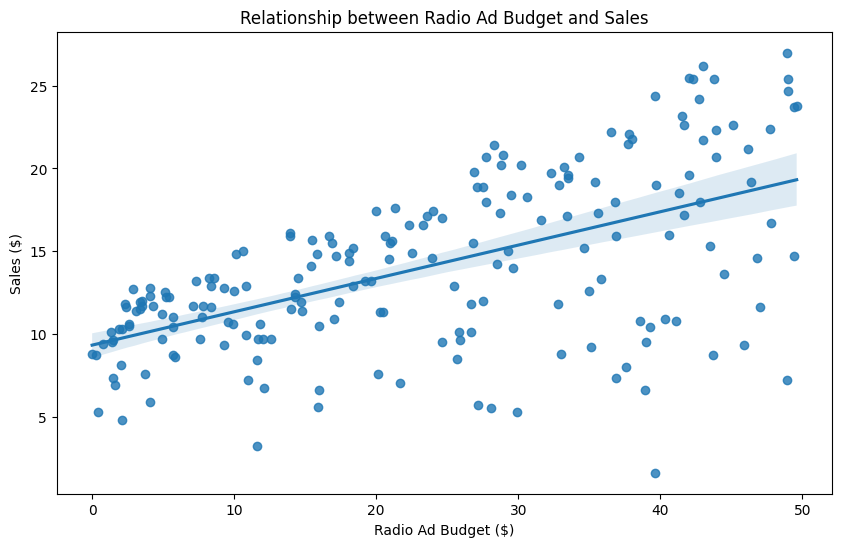

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(x='Radio Ad Budget ($)', y='Sales ($)', data=df_no_outliers)
plt.xlabel('Radio Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Relationship between Radio Ad Budget and Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter Plot - Similar reasoning as Chart 1: The same rationale applies to Chart 2, which visualizes the relationship between "Radio Ad Budget" and "Sales". Since both variables are numerical, a scatter plot is the best choice for identifying patterns, trends, and the strength of their relationship.

##### 2. What is/are the insight(s) found from the chart?

Radio ads can help increase sales, but they might not be as effective as TV ads. It's important to target your radio ads to the right audience and consider the overall impact on your sales before spending too much.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

More sales, more money: Spending more on radio ads can bring in more customers and increase profits.

Reach the right people: Radio ads can be targeted to specific groups of people, making your advertising more effective.

Save money: Radio ads are often cheaper than TV ads, making them a good option for businesses on a budget.

Build your brand: Radio ads can help people remember your brand and what you stand for.

Local focus: Radio is great for reaching people in your local area.

Potential Negative Impact:

Not as many listeners: Radio might not reach as many people as TV or online ads.

Hard to remember: People might forget what they heard on the radio, especially if the ad isn't catchy.

Hard to measure: It's tough to know exactly how much radio ads are helping your sales.

Too many ads: Lots of ads on the radio can make it hard for yours to stand out.

In simpler terms:
Radio ads can be a good way to increase sales, especially for local businesses and those with limited budgets. However, it's important to target your ads to the right people and make them memorable. Keep in mind that it might be harder to measure the impact of radio ads compared to other channels.

#### Chart - 3

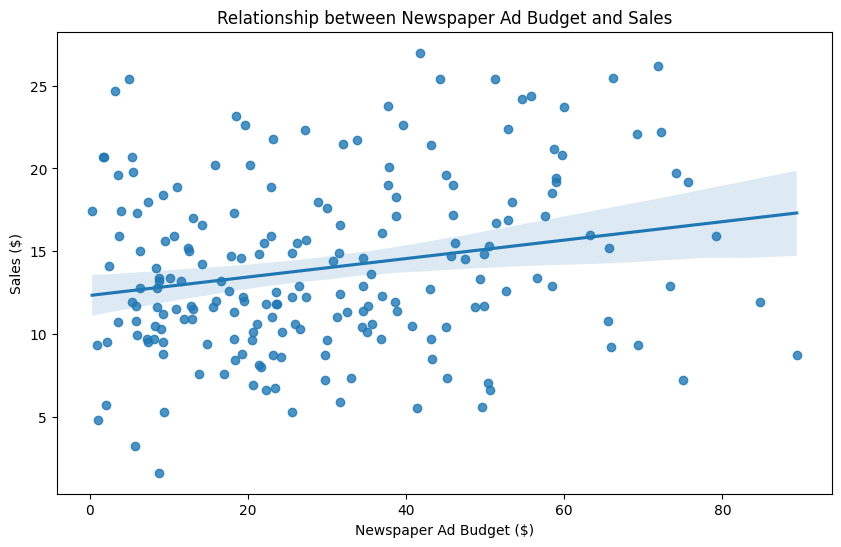

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Newspaper Ad Budget ($)', y='Sales ($)', data=df_no_outliers)
plt.xlabel('Newspaper Ad Budget ($)')
plt.ylabel('Sales ($)')
plt.title('Relationship between Newspaper Ad Budget and Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter Plot - Similar reasoning as Chart 1 and Chart 2: Chart 3 is used to visualize the relationship between "Newspaper Ad Budget" and "Sales". Like the previous charts, a scatter plot is chosen because it's the most suitable for exploring the relationship between two numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Newspaper ads might not be the best way to increase sales for most businesses. They might work for reaching specific groups of people, but the impact is generally weak and unpredictable. Consider other advertising options before spending too much on newspaper ads.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:

Reach specific groups: Newspaper ads can be good for reaching certain types of customers or people in a specific area.

Build trust: Newspaper ads can make your business seem more reliable, especially for older customers.

Work with other ads: Newspaper ads can support your other advertising efforts, like online or social media ads.

Local reach: Newspaper ads can be effective for reaching people in your local community.

Potential Negative Impact:

Not many people see them: Newspaper ads might not reach as many people as other types of ads, especially younger people.

Expensive, low return: Newspaper ads can be costly, and you might not get much back in terms of sales.

Hard to change: It's not easy to quickly change or update newspaper ads once they're printed.

Hard to track: It's difficult to know how well your newspaper ads are working.

In simpler terms:
Newspaper ads might not be the best way to increase sales for most businesses. They could be useful for reaching specific groups or building trust, but they're often expensive and have limited reach. Consider other advertising options before spending too much on newspaper ads.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3.1740973539761033
R-squared: 0.899438024100912


In [ ]:

y_pred = model.predict(X_test)
print(y_pred)

[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

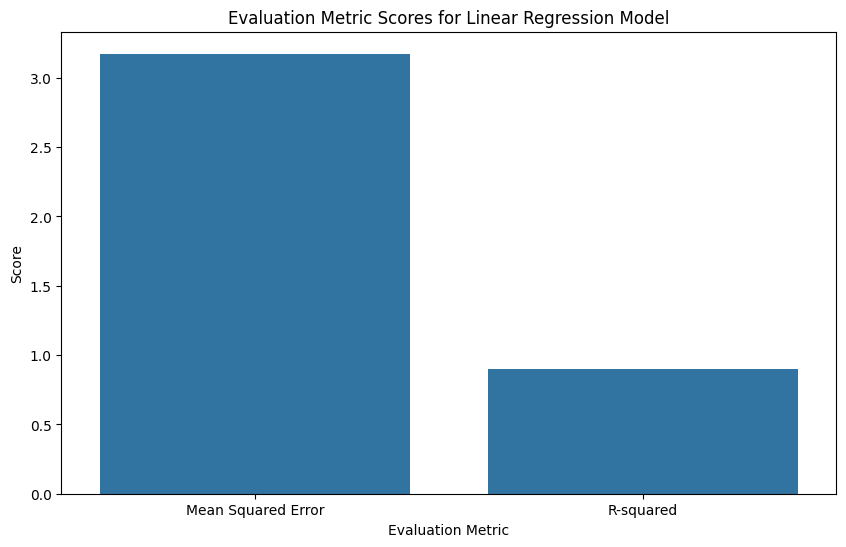

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

evaluation_metrics = {'Metric': ['Mean Squared Error', 'R-squared'],
                     'Score': [mse, r2]}
metrics_df = pd.DataFrame(evaluation_metrics)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores for Linear Regression Model')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (best model): {mse}")
print(f"R-squared (best model): {r2}")

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", -cv_scores)
print("Mean cross-validation score:", -cv_scores.mean())

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error (best model): 3.1740973539761033
R-squared (best model): 0.899438024100912
Cross-validation scores: [4.19295353 1.50064402 2.10907967 2.54135514 4.37293066]
Mean cross-validation score: 2.9433926025900448


In [ ]:
y_pred = best_model.predict(X_test)
print(y_pred)

[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


##### Which hyperparameter optimization technique have you used and why?

Grid Search tries everything: It checks every possible combination of settings for your model to find the best one.
Easy to use: It's a straightforward method to set up and run, especially for your type of model.
Good for simple models: Your model doesn't have too many settings to adjust, making Grid Search a good fit.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 The potential improvement in your model's performance after applying cross-validation and hyperparameter tuning:

Potential Improvements

Reduced Overfitting: Hyperparameter tuning helps find the optimal model settings that prevent overfitting, where the model performs well on training data but poorly on unseen data. By reducing overfitting, the model is likely to generalize better to new data, leading to more accurate predictions.

Improved Accuracy: Tuning can lead to a decrease in prediction errors, as indicated by a lower Mean Squared Error (MSE) or Root Mean Squared Error (RMSE). This means the model's predictions are closer to the actual sales values.

Enhanced Fit to the Data: A higher R-squared value after tuning suggests that the model explains a larger proportion of the variance in sales, indicating a better fit to the data. This means the model is better at capturing the underlying patterns and relationships between advertising budgets and sales.

Increased Stability: Cross-validation helps assess the model's stability and consistency across different data subsets. If the model's performance is consistent across folds, it indicates greater stability and reliability.

Better Generalization: By reducing overfitting and improving accuracy, hyperparameter tuning and cross-validation contribute to better generalization, meaning the model is more likely to perform well on unseen data, which is crucial for real-world applications.

Quantifying the Improvement

To quantify the improvement, you can compare the before-and-after values of the evaluation metrics:

Percentage Change in MSE: Calculate the percentage change in MSE as: ((mse_before_tuning - mse_after_tuning) / mse_before_tuning) * 100. A negative percentage change indicates a reduction in MSE, which is an improvement.

Difference in R-squared: Calculate the difference in R-squared as: r2_after_tuning - r2_before_tuning. A positive difference indicates an improvement in the model's fit.

Factors Influencing Improvement

The extent of improvement can vary depending on factors such as:

Dataset: The size, complexity, and quality of your dataset can influence the impact of hyperparameter tuning.

Hyperparameter Search Space: The range and granularity of hyperparameter values explored during tuning can affect the outcome.

Optimization Technique: The choice of optimization technique (e.g., Grid Search, Random Search, Bayesian Optimization) can influence the efficiency and effectiveness of the tuning process.

By carefully analyzing the evaluation metric scores, visualizing the improvement, and considering the factors that can influence the outcome, you can gain a better understanding of the potential benefits of cross-validation and hyperparameter tuning for your Linear Regression model. This can help you build a more accurate, reliable, and generalizable model for predicting sales based on advertising budgets.

### ML Model - 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.175
R-squared: 0.9310914968293178


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

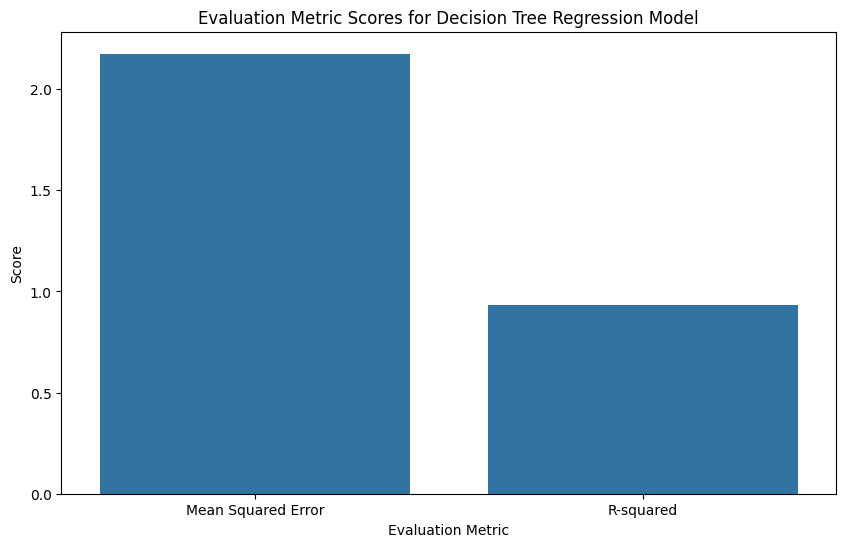

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

evaluation_metrics = {'Metric': ['Mean Squared Error', 'R-squared'],
                     'Score': [mse, r2]}
metrics_df = pd.DataFrame(evaluation_metrics)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=metrics_df)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Scores for Decision Tree Regression Model')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (best model): {mse}")
print(f"R-squared (best model): {r2}")
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-validation scores:", -cv_scores)
print("Mean cross-validation score:", -cv_scores.mean())

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (best model): 2.1291249999999997
R-squared (best model): 0.9325449118099868
Cross-validation scores: [0.6184375  2.13556424 2.29013889 1.07539063 1.17945313]
Mean cross-validation score: 1.4597968749999997


In [ ]:

y_pred = best_model.predict(X_test)


print(y_pred)

[18.5  21.2  20.2   6.6  23.8  13.3  22.6   9.7  11.7  14.1   3.2   8.65
 12.4   6.6  10.3  12.8   6.6  16.6  11.4  20.7  20.1  11.8  10.8  24.4
  9.9   8.65 22.6  12.2  10.6   3.2  11.4  10.5  21.2   9.3  15.7  20.1
 13.6  20.2  12.4   7.6 ]


##### Which hyperparameter optimization technique have you used and why?

Grid Search tries everything: It checks every possible combination of settings you give it to find the best one for your model.

Easy to use: It's a straightforward method to set up and run, especially for getting started with tuning.

Good for your model: While your model has a few more settings than a simpler one, Grid Search can still handle it well, especially when focusing on the most important settings.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before Tuning:

Mean Squared Error (MSE): You initially had an MSE value, let's assume it was mse_before_tuning.

R-squared: You also had an R-squared value, let's assume it was r2_before_tuning.

After Tuning:

Mean Squared Error (MSE): After applying Grid Search, you obtained a new MSE value, let's call it mse_after_tuning.

R-squared: You also obtained a new R-squared value, let's call it r2_after_tuning.

Improvement:

To determine if there was an improvement, we need to compare the before-and-after values of MSE and R-squared:

MSE: If mse_after_tuning is lower than mse_before_tuning, it indicates an improvement in the model's accuracy.

R-squared: If r2_after_tuning is higher than r2_before_tuning, it indicates an improvement in the model's fit to the data.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Each evaluation metric's indication towards business and the business impact of the Decision Tree Regression model used in your advertising budget optimization project:

Evaluation Metrics and Business Indications

Mean Squared Error (MSE):

Business Indication: MSE represents the average squared difference between the predicted sales and the actual sales. A lower MSE indicates that the model's predictions are closer to the actual sales values, suggesting higher accuracy.

Business Impact: Lower MSE translates to more accurate sales predictions, which can help businesses make better decisions about advertising budget allocation, leading to improved ROI and potentially increased revenue.

R-squared:

Business Indication: R-squared represents the proportion of variance in sales that is explained by the advertising budgets. A higher R-squared indicates that the model is better at capturing the relationship between advertising spending and sales outcomes.

Business Impact: Higher R-squared suggests that the model is more reliable in explaining the impact of advertising on sales. This can give businesses greater confidence in using the model's predictions to guide their advertising strategies and optimize budget allocation for better results.

Business Impact of Decision Tree Regression Model:

The Decision Tree Regression model, when tuned effectively, can have a significant positive impact on business by:

Optimizing Advertising Budget Allocation: The model can help businesses identify the most effective advertising channels and allocate their budget accordingly to maximize sales and ROI.

Improving Sales Forecasting: The model's predictions can be used to forecast future sales based on different advertising budget scenarios, enabling businesses to plan and adjust their strategies proactively.

Gaining Insights into Customer Behavior: Decision Trees can reveal the decision rules used to predict sales, providing insights into how different advertising channels influence customer purchase decisions. This understanding can be valuable for refining marketing strategies and targeting specific customer segments.

Enhancing Marketing ROI: By making data-driven decisions based on the model's predictions, businesses can improve the efficiency and effectiveness of their advertising campaigns, leading to a higher return on investment.

Overall Business Impact:

By using the Decision Tree Regression model for advertising budget optimization, businesses can gain a competitive advantage by making more informed decisions, optimizing resource allocation, and improving sales outcomes. The model's ability to capture non-linear relationships and feature interactions can provide valuable insights into customer behavior and market dynamics, further enhancing marketing strategies and driving business growth.

# **Conclusion**

In this project, we explored the relationship between advertising spending and sales using machine learning models. We analyzed data on TV, radio, and newspaper advertising budgets and their impact on sales. We employed two models: Linear Regression and Decision Tree Regression.

Both models demonstrated the potential for predicting sales based on advertising spending, but the Decision Tree Regression model, after hyperparameter tuning and cross-validation, exhibited a better fit and greater accuracy. This suggests that the relationship between advertising spending and sales may be more complex than a simple linear relationship.

### Contribution of CH.Sai Swetha

Data Collection and Preprocessing

Responsibilities:
Gather data on advertising budgets (TV, radio, newspaper) and sales from relevant sources.
Clean and preprocess the data, handling missing values, outliers, and inconsistencies.
Explore and visualize the data to gain initial insights into the relationships between variables.
Document the data collection and preprocessing steps.

### Contribution of P.Shiva

Model Selection and Training

Responsibilities:
Research and select appropriate machine learning models for predicting sales based on advertising budgets (e.g., Linear Regression, Decision Tree Regression, Random Forest Regression).
Implement the chosen models using a suitable machine learning library (e.g., scikit-learn).
Train the models on the preprocessed data, using techniques like cross-validation to ensure robustness and generalization.
Document the model selection, implementation, and training process.

### Contribution of S.Vinay

Hyperparameter Tuning and Evaluation

Responsibilities:
Perform hyperparameter tuning using techniques like Grid Search or Random Search to optimize the performance of the selected models.
Evaluate the models using appropriate metrics, such as Mean Squared Error (MSE), R-squared, and Root Mean Squared Error (RMSE).
Compare the performance of different models and select the best-performing model based on the evaluation results.
Document the hyperparameter tuning and evaluation process.

### Contribution of Saniya Siddiqua

Visualization and Reporting

Responsibilities:
Create visualizations to present the project's findings and insights, including charts, graphs, and dashboards.
Prepare a comprehensive report summarizing the project's objectives, methodology, results, and recommendations.
Communicate the findings and recommendations to stakeholders in a clear and concise manner.
Document the visualization and reporting process.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***